In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Set the display format to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Cleaning

In [3]:
#Load the dataset, and specify the encoding type
companies = pd.read_csv('companies.csv', encoding='latin_1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
#Load the dataset, and specify the encoding type
rounds2 = pd.read_csv('rounds2.csv', encoding='latin_1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


### Lowercase conversion
Company names are present in different case style. Converting all to lowercase for unique identification

In [5]:
companies['permalink'] = companies['permalink'].apply(lambda x: x.lower())
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())

In [6]:
# count the no of unique company names
companies['permalink'].nunique(), rounds2['company_permalink'].nunique()

(66368, 66370)

In [7]:
# Let us see the company names that are different in the 2 dataframes
set(rounds2['company_permalink']).symmetric_difference(set(companies['permalink']))

{'/organization/e-cã\x8abica',
 '/organization/e-cã\x9abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/energystone-games-ç\x81µçÿ³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§\x9fè½¦',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88\x9fä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x9a\x80'}

### Encoding
We see that the same company names are being identified as different due to the presence special characters
Let us change the encoding types of the fields containing company names 

In [8]:
companies['permalink'] = companies['permalink'].str.encode('latin_1').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('latin_1').str.decode('ascii', 'ignore')

In [9]:
# check the difference again
set(rounds2['company_permalink']).symmetric_difference(set(companies['permalink']))

set()

### Unique companies
Now, let us check number of unique companies in both the datasets

In [10]:
companies['permalink'].nunique(), rounds2['company_permalink'].nunique()

(66368, 66368)

### Merge
We can see that both the datasets have same companies in them. 
They can be easily merged by doing a inner join on those columns

In [11]:
master_frame = pd.merge(companies, rounds2, how='inner', left_on='permalink', right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [12]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

In [13]:
# Check the percentage of missing values
print(100*master_frame.isnull().sum()/len(master_frame.index))

permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64


In [14]:
# let us analyze the raised_amount_usd column
master_frame.describe()

,raised_amount_usd
count,94959.00
mean,10426869.33
std,114821247.98
min,0.00
25%,322500.00
50%,1680511.00
75%,7000000.00
max,21271935000.00


We see that the variation in the raised_amount_usd column is very high. Hence, we will not impute the missing values with mean/median 
### Dropping rows with null values
Let us drop the rows that have missing values in raised_amount_usd column as of now.
Other columns also contain missing values, but we will drop them after our analysis on investment type

In [15]:
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

# Amount of data retained
print(100*(len(master_frame.index)/114949))

82.60967907506807


In [16]:
# let us check the funding amount in detail by sorting in ascending order
master_frame.sort_values(by='raised_amount_usd').head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
64472,/organization/mstrial-productions,MsTRIAL Productions,NaN,Media|News|Video,operating,USA,CA,Los Angeles,Burbank,16-07-2008,/organization/mstrial-productions,/funding-round/ac2bdac026d67b9aab25a16cce8a2de7,equity_crowdfunding,NaN,15-07-2015,0.00
69523,/organization/obesity-ppm,Obesity PPM,http://obesityppm.com/,Health and Wellness|Medical,operating,USA,VA,"Washington, D.C.",Great Falls,01-03-2009,/organization/obesity-ppm,/funding-round/9884d48a3fbad112048c07919abd10ae,equity_crowdfunding,NaN,18-06-2015,0.00
58998,/organization/maplace-co,Maplace.co,http://maplace.co,Advertising|Digital Media|Maps|Social Media|So...,operating,GBR,H9,London,London,03-03-2014,/organization/maplace-co,/funding-round/df9e1859a0fb7c5b49c92e6508ec8bb2,seed,NaN,19-08-2015,0.00
13415,/organization/blue-energy-australia,Blue Energy Australia,https://www.e-ternity.com.au,NaN,operating,NaN,NaN,NaN,NaN,11-03-2008,/organization/blue-energy-australia,/funding-round/c27c88449036576ea3bd28908385dd20,seed,NaN,01-11-2015,0.00
69650,/organization/octapoly,Octapoly,NaN,Entertainment|Games,operating,GHA,9,GHA - Other,Takoradi,12-06-2014,/organization/octapoly,/funding-round/c27149369df35fd419bf00187e584047,grant,NaN,24-07-2014,0.00
37719,/organization/friendite-2,Friendite,http://friendite.com,NaN,operating,NGA,25,NGA - Other,Awka,01-12-2012,/organization/friendite-2,/funding-round/4ab0c05850c2cd02ded348d734ccca4e,seed,NaN,01-08-2013,0.00
37720,/organization/frienditeplus,Frienditeplus.com,http://frienditeplus.com,Advertising Platforms|Chat|Social Network Medi...,operating,NGA,25,NGA - Other,Awka,02-02-2013,/organization/frienditeplus,/funding-round/e5c11c080033c07289cc5988c5f05b59,seed,NaN,02-03-2014,0.00
13295,/organization/bloomery-plantation-distillery-b...,Bloomery Plantation Distillery Bloomery SweetS...,http://bloomerysweetshine.com/,NaN,operating,USA,WV,WV - Other,Charles Town,17-09-2011,/organization/bloomery-plantation-distillery-b...,/funding-round/7e958de65fb23286d055144dcd285c7d,equity_crowdfunding,NaN,21-09-2014,0.00
13193,/organization/bliss-4,Bliss,http://blissmobilemassage.com/,Consulting,operating,USA,CA,Los Angeles,Los Angeles,12-03-2015,/organization/bliss-4,/funding-round/32bcda787dadd19519ccad82c0795ed6,equity_crowdfunding,NaN,07-10-2014,0.00
93212,/organization/spartan-3-cybersecurity,Spartan 3 Cybersecurity,http://www.spartan3.com/,Cyber Security|Security|Software,operating,USA,NH,"Manchester, New Hampshire",Bedford,04-11-2014,/organization/spartan-3-cybersecurity,/funding-round/03e3e99dc66d3f2084bad307b710bc52,equity_crowdfunding,NaN,04-11-2014,0.00


In [17]:
# number of rows with 0 investment amount
len(master_frame[master_frame['raised_amount_usd']==0])

415

### Removing Outliers

Zero investment amount is not useful to the analysis. It is as good as not investing.
So let us remove them from our datframe

In [18]:
master_frame = master_frame[master_frame['raised_amount_usd']>0]
# Amount of data retained
print(100*(len(master_frame.index)/114949))

82.24864940103872


In [19]:
# let us check the funding amount in detail by sorting in descending order
master_frame.sort_values(by='raised_amount_usd', ascending=False).head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
106562,/organization/verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,/organization/verizon,/funding-round/2bd1f5a0e7b03d7db9af5f714e6b9cdd,debt_financing,NaN,28-02-2014,21271935000.00
37569,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,NaN,21-10-2006,17600000000.00
16470,/organization/cambridge-technology-group,Cambridge Technology Group,NaN,Consulting|Product Development Services|Produc...,operating,NaN,NaN,NaN,NaN,01-01-1988,/organization/cambridge-technology-group,/funding-round/896482503c37ea60a54dda3cd7a323d6,post_ipo_equity,NaN,01-01-2000,10664943639.00
86136,/organization/sberbank,Sberbank,http://www.sberbank.ru,Banking|Finance,ipo,RUS,48,Moscow,Moscow,NaN,/organization/sberbank,/funding-round/a48f63dcba48312b9d3b8e1b21fcdd9f,post_ipo_debt,NaN,07-07-2014,5800000000.00
16474,/organization/cambridge-technology-partners-ctp,Cambridge Technology Partners (CTP),NaN,Architecture|Banking|Finance,ipo,NaN,NaN,NaN,NaN,11-01-1990,/organization/cambridge-technology-partners-ctp,/funding-round/38c4e6a4046032a047be1ef06c28b06e,undisclosed,NaN,01-01-2001,5000000000.00
75532,/organization/ping-an,Ping An,http://www.pingan.com/,Banking|Financial Services|Insurance|Investmen...,operating,CHN,NaN,NaN,NaN,NaN,/organization/ping-an,/funding-round/d4b60b811b58b882e2ca18decc30e657,private_equity,NaN,01-12-2014,4745460219.00
60207,/organization/mediavast,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999,/organization/mediavast,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,B,30-06-2003,4700000000.00
96027,/organization/suning,Suning,http://suning.com,Distributors|E-Commerce|Manufacturing,ipo,CHN,4,Nanjing,Nanjing,01-01-1996,/organization/suning,/funding-round/3cd59297a2c3949aa1897313f6c99259,undisclosed,NaN,10-08-2015,4630000000.00
106564,/organization/verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,/organization/verizon,/funding-round/d93e96a34475247d7902a12c3525b87f,debt_financing,NaN,05-03-2012,3835050000.00
106565,/organization/verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983,/organization/verizon,/funding-round/fbb999526a72f69c7ac2b5088fb7116a,debt_financing,NaN,01-03-2013,3822518000.00


### Observations
Upon manually checking random entries with the crunchbase website. Most of the rows have correct values,
which means that they are natural outiers, so we will proceed by keeping them as it is

### Dropping unnecessary columns
As we will do our analysis on category_list, country_code, funding_round_type, raised_amount_usd, etc. Other columns are not needed.
Let us drop them

In [20]:
master_frame = master_frame.drop(['permalink','name','homepage_url','status','state_code','region','city','funding_round_permalink','funding_round_code','founded_at','funded_at'], axis=1)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94544 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_list       93524 non-null  object 
 1   country_code        88729 non-null  object 
 2   company_permalink   94544 non-null  object 
 3   funding_round_type  94544 non-null  object 
 4   raised_amount_usd   94544 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


# Funding Type Analysis

In [21]:
# Check the distribution of values in raised_amount_usd column by each funding round type
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4829.00,964848.86,7427730.66,12.00,150000.00,400000.00,1000000.00,494511992.00
convertible_note,1423.00,1477951.91,8109207.56,30.00,83331.00,300000.00,1000000.00,185048285.00
debt_financing,6656.00,17110102.30,280865377.60,100.00,340445.25,1100000.00,4000000.00,21271935000.00
equity_crowdfunding,1046.00,632042.22,1847071.26,5.00,35000.00,157637.50,500000.00,27400000.00
grant,2122.00,4304629.66,25599144.21,300.00,50000.00,205200.00,1700000.00,750000000.00
non_equity_assistance,70.00,428826.04,1807734.41,2.00,27000.00,60000.00,170400.50,15000000.00
post_ipo_debt,152.00,168704571.82,602473804.43,70000.00,4000000.00,19950000.00,60000000.00,5800000000.00
post_ipo_equity,628.00,82182493.87,469188915.85,77.00,3764794.00,12262852.50,40000000.00,10664943639.00
private_equity,1933.00,73422367.36,198246135.05,6.00,5000000.00,20000000.00,75000000.00,4745460219.00


### Representative metric
We can observe that there is significant difference in the values of mean and median, and std is also high

The data we have is skewed, as we have already seen that we have natural outliers in the raised_amount_usd column.
Hence, we will go with median as our representative value of the investment amount 

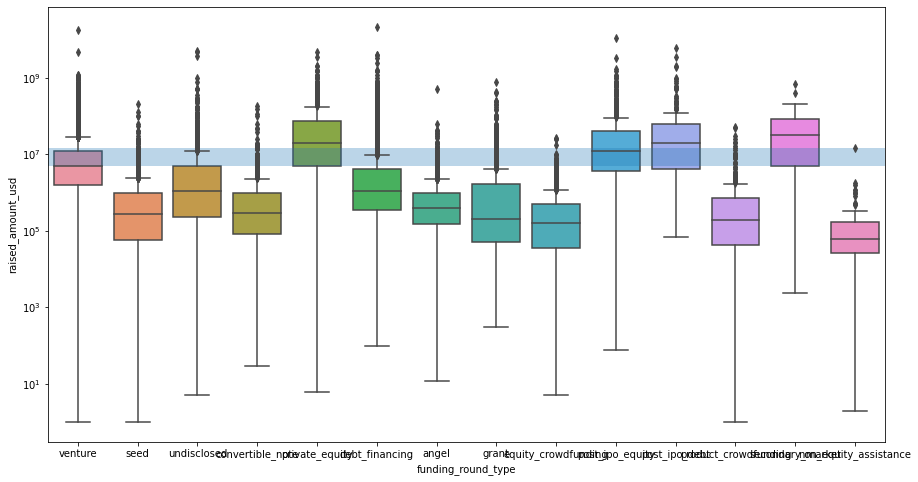

In [22]:
# box plot to visualize spread of investment amount in each funding type
plt.figure(figsize=[15,8])
plt.axhspan(5000000, 15000000, alpha=0.3)
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
# Changed the y-axis to a log scale to allow a bigger range of values to be displayed 
plt.yscale('log')

### Analyzing on seed, angel, venture, private_equity
Since we are concernred with only 4 funding types(venture, angel, seed, and private equity), Let us visualize the median amount of investment in each of these types 

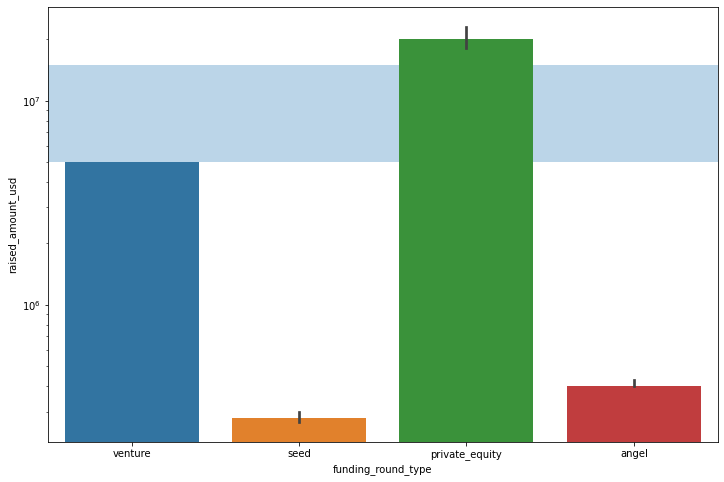

In [23]:
master_frame_4_plot = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
plt.figure(figsize=[12,8])
plt.axhspan(5000000, 15000000, alpha=0.3)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame_4_plot, estimator=np.median, log=True)
plt.show()

In [24]:
# count number of investments in each funding type with amount between $5-15M
funding_counts = master_frame[(master_frame['raised_amount_usd'] >=5000000) & 
             (master_frame['raised_amount_usd'] <=15000000)].groupby('funding_round_type').size()
funding_counts.sort_values(ascending=False)

funding_round_type
venture                  16598
debt_financing             870
private_equity             429
undisclosed                226
seed                       203
grant                      173
post_ipo_equity            152
angel                       72
convertible_note            48
post_ipo_debt               34
equity_crowdfunding         23
product_crowdfunding        15
secondary_market             4
non_equity_assistance        1
dtype: int64

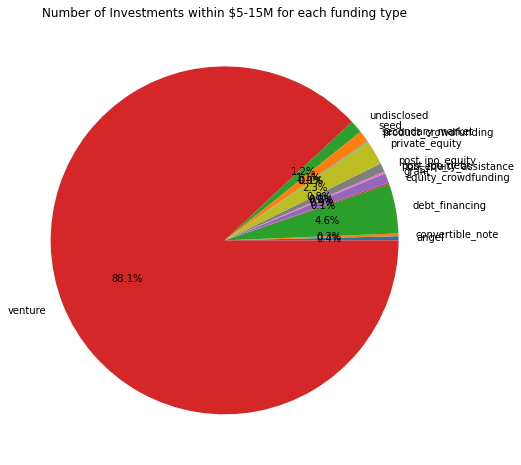

In [25]:
# pie chart to see the percentage distribution in number of investments in each funding type
plt.figure(figsize=[12,8])
plt.pie(funding_counts, labels=funding_counts.index, autopct='%1.1f%%')
plt.title('Number of Investments within $5-15M for each funding type')
plt.show()

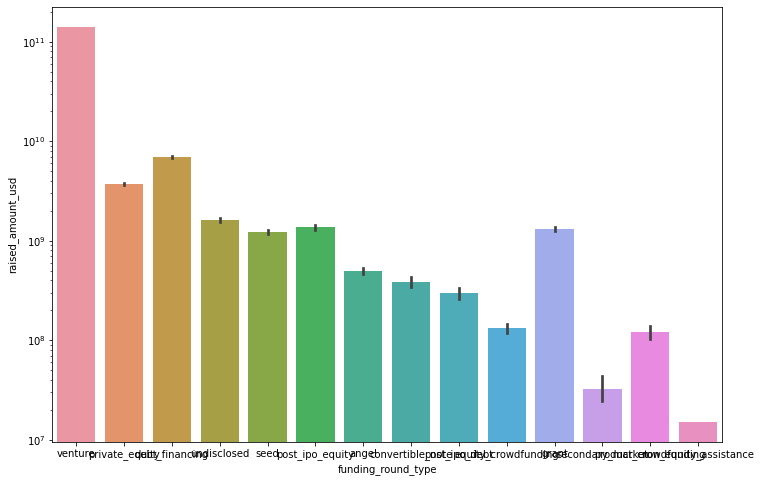

In [38]:
# total amount of investment in each funding type
plt.figure(figsize=[12,8])
funding_amounts = master_frame[(master_frame['raised_amount_usd'] >=5000000) & 
             (master_frame['raised_amount_usd'] <=15000000)]
sns.barplot(data=funding_amounts, x='funding_round_type', y='raised_amount_usd', estimator=np.sum, log=True)
plt.show()

### Observations
We can see the both the mean and median values of the funding type **venture** satisfy the investment criteria of Spark Funds(5-15 M dollars).

Also, from the pie chart we can see that funding type 'venture' has most number of  investments within the 5-15M dollar range.
From the bar chart we see 'venture' has highest total amount of investment with each investment amount being between $5-15M

Based on all these obversations, we can conlcude that **Venture** investment type will the most suitable for Spark Funds

# Country Analysis

Firstly, we will clean the data by removing rows containing missing values in country_code and category_list columns

In [26]:
# let us come back to null values
print(100*master_frame.isnull().sum()/len(master_frame.index))

category_list        1.08
country_code         6.15
company_permalink    0.00
funding_round_type   0.00
raised_amount_usd    0.00
dtype: float64


In [27]:
# percentage of rows for each country code
master_frame['country_code'].value_counts()*100/len(master_frame.index)

USA   65.33
GBR    5.30
CAN    2.75
CHN    2.04
IND    1.73
       ... 
TGO    0.00
DMA    0.00
KNA    0.00
SYC    0.00
DZA    0.00
Name: country_code, Length: 134, dtype: float64

### Observations
We see that 65% of the data is for country_code USA. 

If we replace the missing values with USA, it will further increase the skewness of the data. 
Hence, it is better to drop the rows

In [28]:
master_frame = master_frame[~master_frame['country_code'].isnull()]
print(100*master_frame.isnull().sum()/len(master_frame.index))

category_list        0.63
country_code         0.00
company_permalink    0.00
funding_round_type   0.00
raised_amount_usd    0.00
dtype: float64


#### There are very few rows with missing category_list. We should drop them as well

In [29]:
master_frame = master_frame[~master_frame['category_list'].isnull()]

# Amount of rows retained
print(100*(len(master_frame.index)/114949))

76.70010178426955


In [30]:
# Download the country code data from iban webpage
country_code = pd.read_html('https://www.iban.com/country-codes')
country_code_df = country_code[0][['Country','Alpha-3 code']]
country_code_df.head()

,Country,Alpha-3 code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [31]:
# check for country codes that are not present in the alpha3 list 
set(master_frame['country_code']) - set(country_code_df['Alpha-3 code'])

{'BAH', 'ROM', 'TAN'}

### Country code analysis
Upon manually checking, i see that the country code for these 3 countries have been changed:

Bahamas: BAH -> BHS

Romania: ROM -> ROU

Tanzania: TAN -> TZA

Let us check if the new codes are present in the column to avoid duplicates 

In [31]:
'BHS' in set(master_frame['country_code']), 'ROU' in set(master_frame['country_code']), 'TZA' in set(master_frame['country_code'])

(False, False, False)

The data contains no duplicate country codes. We are safe to proceed

### Top 9 countries with highest total investment

Now, let us find the top nine countries based on the total investment amount each country has received

In [39]:
# filter the dataframe by venture type and take the sum of investment amounts
top9 = master_frame[master_frame['funding_round_type']=='venture'].groupby('country_code')['raised_amount_usd'].sum()
top9 = top9.sort_values(ascending=False).iloc[0:9]
top9 = top9.to_frame().reset_index()
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,CHN,39338918773.00
2,GBR,20072813004.00
3,IND,14261508718.00
4,CAN,9482217668.00
5,FRA,7226851352.00
6,ISR,6854350477.00
7,DEU,6306921981.00
8,JPN,3167647127.00


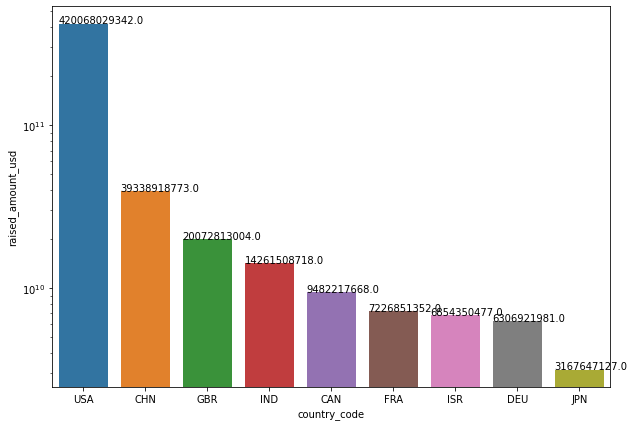

In [40]:
plt.figure(figsize=[10,7])
sns.barplot(data=top9, x='country_code', y='raised_amount_usd', log=True)
for i, v in enumerate(top9['raised_amount_usd']):
    plt.text(i-0.4, v, str(v))
plt.show()

## Identify the top three English-speaking countries

From this graph, we will manually pick top 3 english speaking countries with received the highest total funding 

United States (USA)

United Kingdom (GBR)

India (IND)

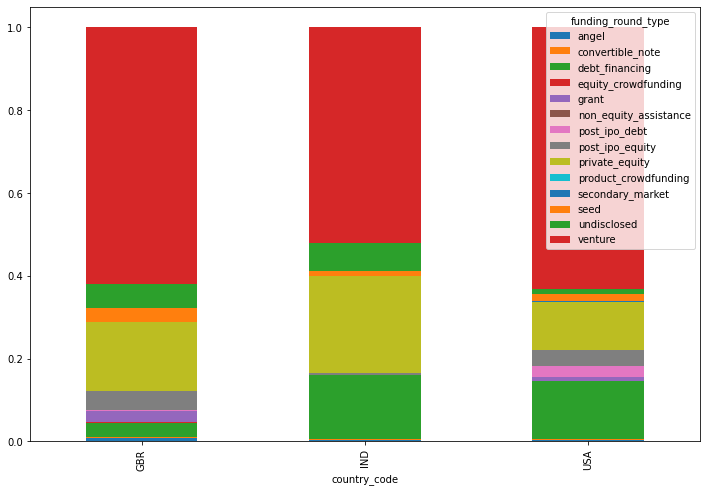

In [41]:
# plot for percentage of total investment done in each funding type in top3 countries
top3_pt = pd.pivot_table(master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])], 
                       index='country_code', values='raised_amount_usd', columns='funding_round_type', 
                         aggfunc='sum').apply(lambda x: x/x.sum(), axis=1)
top3_pt.plot(kind='bar', stacked='True', figsize=[12,8])
plt.show()

### Observation
We can now confirm that the top 3 countries chosen by us have the highest investment as Venture type

## Sector Analysis

In [42]:
# Load the mapping dataset
cat_mapping_df = pd.read_csv('mapping.csv')
cat_mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [43]:
# Check if rows contain more than one 1 entries
cat_mapping_df[cat_mapping_df.sum(axis=1)>1]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [44]:
# Check for missing values
cat_mapping_df.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [45]:
# Drop the rows with missing values
cat_mapping_df = cat_mapping_df[~cat_mapping_df['category_list'].isnull()]
cat_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


### Column Transformation
Transfrom the 8 main sectors to a single column

In [46]:
# convert wide df to long df using melt, and then retain the rows have value=1
cat_mapping_df = cat_mapping_df.melt(id_vars='category_list', var_name='main_sector')
cat_mapping_df = cat_mapping_df[cat_mapping_df.value == 1].reset_index(drop=True).drop('value',axis=1)
cat_mapping_df.head()

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [47]:
cat_mapping_df['main_sector'].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

Note that Blank column had no values, hence it was automatically removed from the main_sector column

### Merge category values

In [48]:
# Retain the primary sector from the category_list column, and convert it to lowercase
master_frame['primary_category'] = master_frame['category_list'].apply(lambda x: x.split('|')[0].lower())
master_frame['primary_category'].value_counts()

biotechnology              9664
software                   5885
advertising                3922
e-commerce                 3592
analytics                  2938
                           ... 
social business               1
racing                        1
mobile shopping               1
mobile emergency&health       1
organic                       1
Name: primary_category, Length: 707, dtype: int64

#### Before we merge the 2 dataframes, let us check for category values which are not present in the cat_mapping_df

In [49]:
# convert to lowercase to not miss values because of different casing
cat_mapping_df['category_list'] = cat_mapping_df['category_list'].apply(lambda x: x.lower())
len(set(master_frame['primary_category']) - set(cat_mapping_df['category_list']))

85

##### We see that 85 primary categories are not present in the mapping dataframe.
Let us check how many rows will be affected because of these 85 values

In [50]:
len(master_frame[~master_frame['primary_category'].isin(cat_mapping_df['category_list'])])

6355

##### This is a huge number of rows, which we cannot afford to lose
Let us analyze the difference in detail

In [51]:
# print values from master_frame that are not present in cat_mapping_df
master_frame[~master_frame['primary_category'].isin(cat_mapping_df['category_list'])]['primary_category'].head(10)

9               analytics
10              analytics
11              analytics
12              analytics
60              analytics
61              analytics
148               finance
150               finance
190    financial services
198             analytics
Name: primary_category, dtype: object

In [52]:
# print values from cat_mapping_df that are not present in master_frame
cat_mapping_df[~cat_mapping_df['category_list'].isin(master_frame['primary_category'])]['category_list'].head(10)

44               energy ma0gement
45                 energy storage
61                  0notechnology
62     0tural language processing
63               0tural resources
71                waste ma0gement
98       digital rights ma0gement
99                 digital sig0ge
102              educatio0l games
106               event ma0gement
Name: category_list, dtype: object

### Observations
We see a pattern of "0" present in the category names, instead of "na".
Let us replace 0 back with na

In [53]:
# print all the categories having 0 in them
cat_mapping_df[cat_mapping_df['category_list'].str.contains('0')]['category_list']

44                 energy ma0gement
61                    0notechnology
62       0tural language processing
63                 0tural resources
71                  waste ma0gement
98         digital rights ma0gement
99                   digital sig0ge
102                educatio0l games
106                 event ma0gement
165             alter0tive medicine
174                         can0bis
204            medical professio0ls
213                  perso0l health
226                       veteri0ry
283                   chi0 internet
289                 cloud ma0gement
309                       jour0lism
319                       0vigation
329          professio0l networking
350              document ma0gement
360                  enterprise 2.0
372                 fleet ma0gement
382                       gover0nce
403    intellectual asset ma0gement
411                    it ma0gement
414             knowledge ma0gement
419                  lead ma0gement
457                    perso

In [54]:
# replace all 0s with na, except for enterprise 2.0
cat_mapping_df['category_list'] = cat_mapping_df['category_list'].apply(lambda x: x if x=='enterprise 2.0' else x.replace('0','na'))

# count no of rows in master_frame that do not have a category in the mapping file
len(master_frame[~master_frame['primary_category'].isin(cat_mapping_df['category_list'])])

60

In [55]:
# print the rows in master_frame that do not have a category in the mapping file
master_frame[~master_frame['primary_category'].isin(cat_mapping_df['category_list'])]

,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_category
2600,Cause Marketing|Charity,USA,/organization/adora-inc,seed,60000.00,cause marketing
6333,Real Estate Investors,USA,/organization/apollo-commercial-real-estate-fi...,debt_financing,50000000.00,real estate investors
8094,English-Speaking|Translation,SGP,/organization/asia-translate,venture,20000.00,english-speaking
12480,Toys,HKG,/organization/bioserie,seed,40000.00,toys
12481,Toys,HKG,/organization/bioserie,seed,100000.00,toys
12483,Toys,HKG,/organization/bioserie,seed,240000.00,toys
13764,Generation Y-Z|Photo Sharing|Social Media,USA,/organization/blurr-llc,seed,2370000.00,generation y-z
17604,Enterprise Hardware|Retail,RUS,/organization/cartpay-co-,angel,30000.00,enterprise hardware
17605,Enterprise Hardware|Retail,RUS,/organization/cartpay-co-,venture,50000.00,enterprise hardware
17610,Social Media Advertising|Social Media Marketing,USA,/organization/carusele,seed,250000.00,social media advertising


#### Check other categories if not primary
We still have some rows that do not have the primary sector name in the mapping file
Let us check if additional category(2nd, 3rd, so on...) sectors exists. If yes, we can assign those as primary instead of losing the rows

In [56]:
# loop through all the categories and return the one that is present in the mapping dataframe.
# If none of the categories are present, return the primary category
unique_categories = set(cat_mapping_df['category_list'])

def find_primary_category(x):
    crr = x.lower().split('|')
    for category in crr:
        if category in unique_categories:
            return category
    return crr[0]

master_frame['primary_category'] = master_frame['category_list'].apply(find_primary_category)

# again count no of rows in master_frame that do not have a category in the mapping file
len(master_frame[~master_frame['primary_category'].isin(cat_mapping_df['category_list'])])

20

In [57]:
# print the different category values that are present in 1 but not another dataframe
set(master_frame['primary_category']).symmetric_difference(unique_categories)

{'energy storage',
 'film distribution',
 'flowers',
 'google glass',
 'lingerie',
 'lotteries',
 'low bid auctions',
 'multi-level marketing',
 'natural gas uses',
 'nightlife',
 'pervasive computing',
 'plumbers',
 'product search',
 'racing',
 'real estate investors',
 'retirement',
 'skill gaming',
 'smart grid',
 'social recruiting',
 'spas',
 'specialty retail',
 'subscription businesses',
 'swimming',
 'taxis',
 'toys',
 'vacation rentals',
 'veterinary',
 'virtual workforces',
 'women'}

## Dropping rows
By assigning other category rather than primary, we managed to save a lot of rows getting lost.

Now before merging, we can remove the rows having primary category that are not present in the cat_mapping_df

In [58]:
# Remove rows that containing category values that are not present in the cat_mapping_df
master_frame = master_frame[master_frame['primary_category'].isin(cat_mapping_df['category_list'])]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88146 entries, 0 to 114947
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_list       88146 non-null  object 
 1   country_code        88146 non-null  object 
 2   company_permalink   88146 non-null  object 
 3   funding_round_type  88146 non-null  object 
 4   raised_amount_usd   88146 non-null  float64
 5   primary_category    88146 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


### Merge
Now, we can do a left join to add main_sector column to our master_frame

In [59]:
master_frame = pd.merge(master_frame, cat_mapping_df, how='left', left_on='primary_category', right_on='category_list')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88146 entries, 0 to 88145
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_list_x     88146 non-null  object 
 1   country_code        88146 non-null  object 
 2   company_permalink   88146 non-null  object 
 3   funding_round_type  88146 non-null  object 
 4   raised_amount_usd   88146 non-null  float64
 5   primary_category    88146 non-null  object 
 6   category_list_y     88146 non-null  object 
 7   main_sector         88146 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [60]:
# dropping columns we dont need
master_frame = master_frame.drop(['category_list_x','category_list_y','primary_category'], axis=1)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88146 entries, 0 to 88145
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        88146 non-null  object 
 1   company_permalink   88146 non-null  object 
 2   funding_round_type  88146 non-null  object 
 3   raised_amount_usd   88146 non-null  float64
 4   main_sector         88146 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


In [61]:
# double check for missing values
master_frame.isnull().sum()

country_code          0
company_permalink     0
funding_round_type    0
raised_amount_usd     0
main_sector           0
dtype: int64

## Sector analysis for top 3 english speaking countries

Creating separate dataframes of 3 countries with Funding type **Venture** and investments range of **5-15 M USD**

In [62]:
D1 = master_frame[(master_frame['country_code']=='USA') & 
                  (master_frame['funding_round_type']=='venture') & 
                  (master_frame['raised_amount_usd']>=5000000) & 
                  (master_frame['raised_amount_usd']<=15000000) ]
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 9 to 88135
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        12064 non-null  object 
 1   company_permalink   12064 non-null  object 
 2   funding_round_type  12064 non-null  object 
 3   raised_amount_usd   12064 non-null  float64
 4   main_sector         12064 non-null  object 
dtypes: float64(1), object(4)
memory usage: 565.5+ KB


In [63]:
D2 = master_frame[(master_frame['country_code']=='GBR') & 
                  (master_frame['funding_round_type']=='venture') & 
                  (master_frame['raised_amount_usd']>=5000000) & 
                  (master_frame['raised_amount_usd']<=15000000) ]
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 288 to 88116
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        621 non-null    object 
 1   company_permalink   621 non-null    object 
 2   funding_round_type  621 non-null    object 
 3   raised_amount_usd   621 non-null    float64
 4   main_sector         621 non-null    object 
dtypes: float64(1), object(4)
memory usage: 29.1+ KB


In [64]:
D3 = master_frame[(master_frame['country_code']=='IND') & 
                  (master_frame['funding_round_type']=='venture') & 
                  (master_frame['raised_amount_usd']>=5000000) & 
                  (master_frame['raised_amount_usd']<=15000000) ]
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 87917
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        328 non-null    object 
 1   company_permalink   328 non-null    object 
 2   funding_round_type  328 non-null    object 
 3   raised_amount_usd   328 non-null    float64
 4   main_sector         328 non-null    object 
dtypes: float64(1), object(4)
memory usage: 15.4+ KB


In [65]:
# Calculate the total amount of investments the three countries.
D1['raised_amount_usd'].sum(), D2['raised_amount_usd'].sum(), D3['raised_amount_usd'].sum(), 

(107766584223.0, 5379078691.0, 2949543602.0)

In [66]:
# Calculate the total number of investments in each sector for USA
D1.groupby('main_sector')['raised_amount_usd'].size().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      910
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

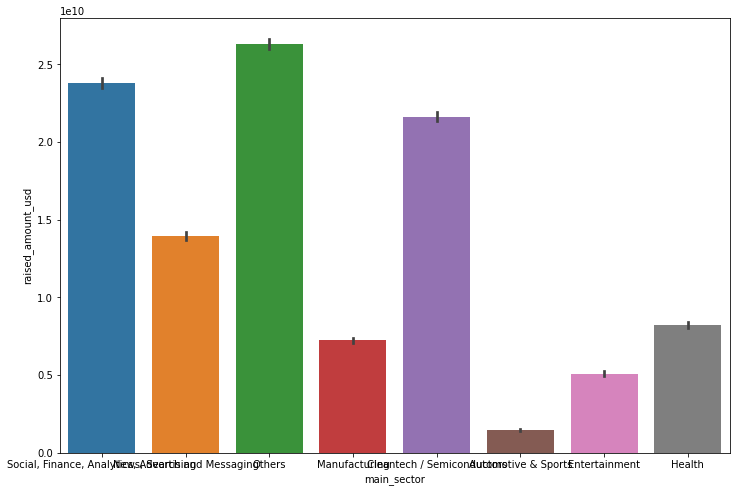

In [67]:
# plot for total amount invested in each sector
plt.figure(figsize=[12,8])
sns.barplot(data=D1, x='main_sector', y='raised_amount_usd', estimator=np.sum)
plt.show()

In [68]:
# Calculate the total number of investments in each sector for GBR
D2.groupby('main_sector')['raised_amount_usd'].size().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

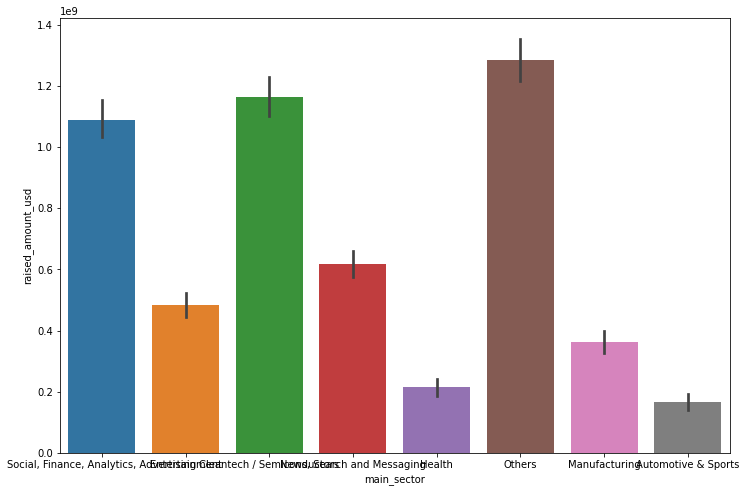

In [69]:
# plot for total amount invested in each sector
plt.figure(figsize=[12,8])
sns.barplot(data=D2, x='main_sector', y='raised_amount_usd', estimator=np.sum)
plt.show()

In [70]:
# Calculate the total number of investments in each sector for IND
D3.groupby('main_sector')['raised_amount_usd'].size().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

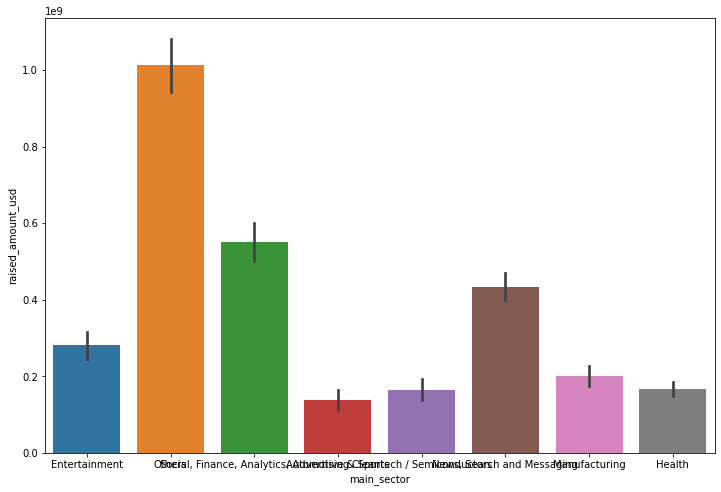

In [71]:
# plot for total amount invested in each sector
plt.figure(figsize=[12,8])
sns.barplot(data=D3, x='main_sector', y='raised_amount_usd', estimator=np.sum)
plt.show()

In [72]:
# For the top sector count-wise, which company received the highest investment in USA?
D1[D1['main_sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/virtustream           64300000.00
/organization/capella               54968051.00
/organization/airtight-networks     54201907.00
/organization/decarta               52100000.00
/organization/black-duck-software   51000000.00
                                        ...    
/organization/capton                 5000000.00
/organization/capital-teas           5000000.00
/organization/campus-quad            5000000.00
/organization/campus-explorer        5000000.00
/organization/netqos                 5000000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

In [73]:
# For the second-best sector count-wise, which company received the highest investment in USA?
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/shotspotter        67933006.00
/organization/demandbase         63000000.00
/organization/intacct            61800000.00
/organization/netbase            60600000.00
/organization/lotame             59700000.00
                                     ...    
/organization/logi-analytics      5000000.00
/organization/smartturn           5000000.00
/organization/fractal-sciences    5000000.00
/organization/amtec-lcc           5000000.00
/organization/initiate-systems    5000000.00
Name: raised_amount_usd, Length: 1847, dtype: float64

In [74]:
# For the top sector count-wise, which company received the highest investment in GBR?
D2[D2['main_sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/electric-cloud            37000000.00
/organization/sensage                   36250000.00
/organization/enigmatic                 32500000.00
/organization/silverrail-technologies   29000000.00
/organization/opencloud                 27972766.00
                                            ...    
/organization/parcelgenie                5000000.00
/organization/vector-watch               5000000.00
/organization/thefilter                  5000000.00
/organization/udex                       5000000.00
/organization/bacula-systems             5000000.00
Name: raised_amount_usd, Length: 120, dtype: float64

In [75]:
# For the second-best sector count-wise, which company received the highest investment in GBR?
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/celltick-technologies   37500000.00
/organization/mythings                34000000.00
/organization/zopa                    32900000.00
/organization/imagini                 28550000.00
/organization/marketinvoice           25553007.00
                                          ...    
/organization/moo                      5000000.00
/organization/rangespan                5000000.00
/organization/tamoco                   5000000.00
/organization/the-fizzback-group       5000000.00
/organization/duedil                   5000000.00
Name: raised_amount_usd, Length: 104, dtype: float64

In [76]:
# For the top sector count-wise, which company received the highest investment in IND?
D3[D3['main_sector']=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/firstcry-com          39000000.00
/organization/myntra                38000000.00
/organization/commonfloor           32900000.00
/organization/pepperfry-com         28000000.00
/organization/itzcash-card-ltd      25000000.00
                                        ...    
/organization/reznext                5000000.00
/organization/voonik-com             5000000.00
/organization/vedantu-innovations    5000000.00
/organization/securens               5000000.00
/organization/liases-foras           5000000.00
Name: raised_amount_usd, Length: 88, dtype: float64

In [77]:
# For the second-best sector count-wise, which company received the highest investment in IND?
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

company_permalink
/organization/manthan-systems                                50700000.00
/organization/komli-media                                    28000000.00
/organization/shopclues-com                                  25000000.00
/organization/intarvo                                        21900000.00
/organization/grameen-financial-services                     21556050.00
/organization/bankbazaar                                     19000000.00
/organization/microland                                      18300000.00
/organization/eka-software-solutions                         16000000.00
/organization/qyuki                                          15400000.00
/organization/financial-information-network-operations-pvt   15000000.00
/organization/travelguru                                     15000000.00
/organization/shiram-credit                                  15000000.00
/organization/apnaloan                                       15000000.00
/organization/capital-float      

In [78]:
# Keep data of only the top 3 sectors in each countries Dataframe
D1 = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2 = D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D3 = D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]

In [79]:
# Merge all 3 countries dataframe
top_3_country_sector = D1.append(D2).append(D3)

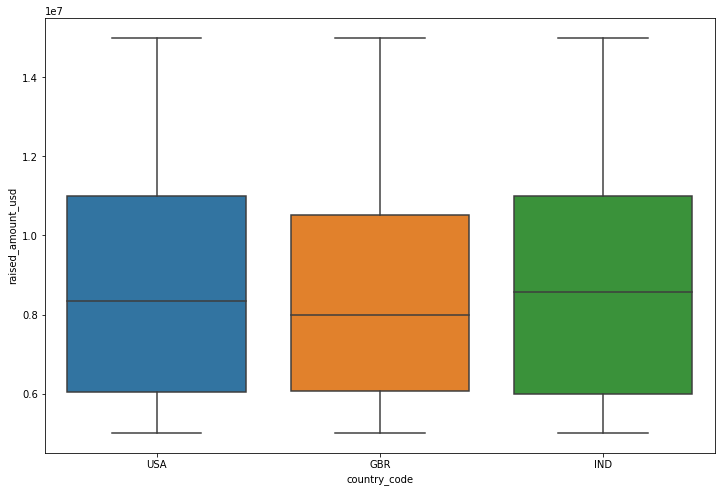

In [81]:
# plot the spread of raised_amount_usd values in all the 3 countries
plt.figure(figsize=[12,8])
sns.boxplot(x='country_code', y='raised_amount_usd', data=top_3_country_sector)
plt.show()

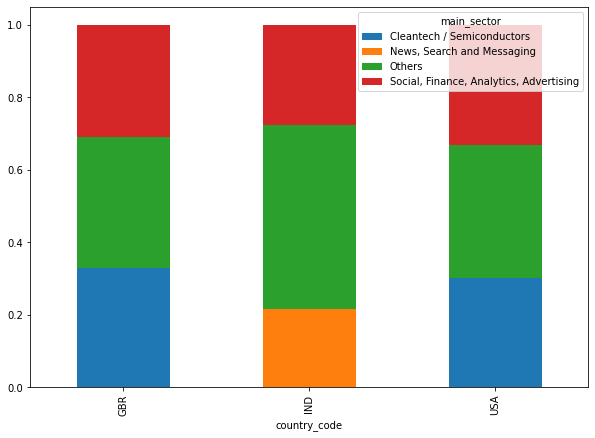

In [82]:
# plot the percentage distribution of total investment amount in all the 3 countries
top_3_pt = pd.pivot_table(data=top_3_country_sector, values='raised_amount_usd', index='country_code', 
               columns='main_sector', aggfunc='sum').apply(lambda x: x/x.sum(), axis=1)
top_3_pt.plot(kind='bar', stacked='True', figsize=[10,7])
plt.show()

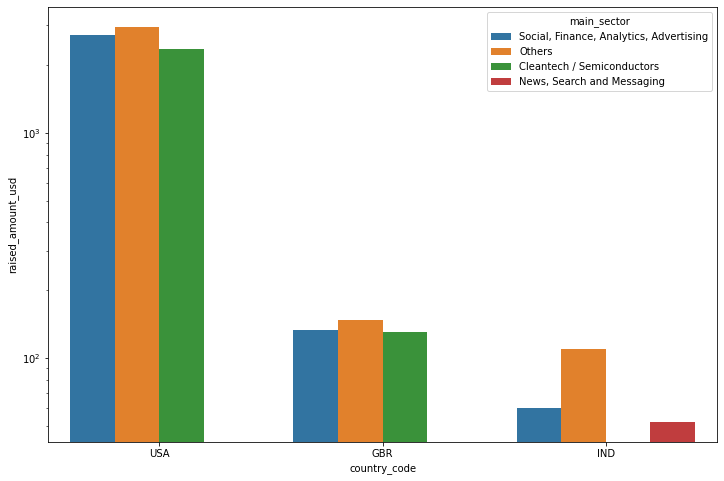

In [83]:
# create a bar plot showing number of investments in the top3 country for top3 sectors
plt.figure(figsize=[12,8])
sns.barplot(data=top_3_country_sector, x='country_code', y='raised_amount_usd', hue='main_sector', estimator=np.size)
plt.yscale('log')